### This is the API file for the Final Project II for my university.
#### In this project (Web Application) the users will be able to see their expense vs budget stats after entering the relevant information about their expenses into the form presented to them in the frontend.
#### The users will also have the option to login/register to the service.
##### The usual information about savings and expenses will also be provided to the user as a bonus.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import joblib

# Reading the datasets:
###### Starting with dataset 1:

In [2]:
df_first = pd.read_excel("/kaggle/input/personal-finance-dataset/personal finance data.xlsx")

In [3]:
df_first.describe()

,Date / Time,Debit/Credit
count,225,225.000000
mean,2021-07-06 02:51:24.266667008,3768.890133
min,2021-01-01 21:45:00,8.000000
25%,2021-02-21 15:40:00,80.000000
50%,2021-06-22 16:41:00,200.000000
75%,2021-11-28 19:59:00,700.000000
max,2021-12-30 14:10:00,55530.000000
std,NaN,12353.959576


###### Reading the dataset 2:

In [4]:
df_second = pd.read_csv("/kaggle/input/personal-finance/personal_transactions.csv")

In [5]:
df_second.describe

<bound method NDFrame.describe of            Date                Description   Amount Transaction Type  \
0    01/01/2018                     Amazon    11.11            debit   
1    01/02/2018           Mortgage Payment  1247.44            debit   
2    01/02/2018            Thai Restaurant    24.22            debit   
3    01/03/2018        Credit Card Payment  2298.09           credit   
4    01/04/2018                    Netflix    11.76            debit   
..          ...                        ...      ...              ...   
801  09/27/2019          Biweekly Paycheck  2250.00           credit   
802  09/28/2019                         BP    33.46            debit   
803  09/28/2019                     Sheetz     4.27            debit   
804  09/30/2019                  Starbucks     1.75            debit   
805  09/30/2019  Internet Service Provider    75.00            debit   

                Category   Account Name  
0               Shopping  Platinum Card  
1        Mortgage

### EDA on the datasets:

In [6]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date / Time     225 non-null    datetime64[ns]
 1   Mode            225 non-null    object        
 2   Category        225 non-null    object        
 3   Sub category    225 non-null    object        
 4   Income/Expense  225 non-null    object        
 5   Debit/Credit    225 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 10.7+ KB


In [7]:
df_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              806 non-null    object 
 1   Description       806 non-null    object 
 2   Amount            806 non-null    float64
 3   Transaction Type  806 non-null    object 
 4   Category          806 non-null    object 
 5   Account Name      806 non-null    object 
dtypes: float64(1), object(5)
memory usage: 37.9+ KB


In [8]:
df_first.columns

Index(['Date / Time', 'Mode', 'Category', 'Sub category', 'Income/Expense',
       'Debit/Credit'],
      dtype='object')

In [9]:
df_second.columns

Index(['Date', 'Description', 'Amount', 'Transaction Type', 'Category',
       'Account Name'],
      dtype='object')

In [10]:
df_first.shape

(225, 6)

In [11]:
df_second.shape

(806, 6)

In [12]:
df_first.head()

,Date / Time,Mode,Category,Sub category,Income/Expense,Debit/Credit
0,2021-01-01 21:45:00,CUB - online payment,Allowance,From dad,Income,8000.0
1,2021-01-01 21:46:00,CUB - online payment,Food,Snacks,Expense,85.0
2,2021-01-03 18:21:00,CUB - online payment,Other,From dad,Income,500.0
3,2021-01-03 18:22:00,CUB - online payment,Household,Stuffs,Expense,6667.0
4,2021-01-03 18:56:00,CUB - online payment,Transportation,Metro,Expense,30.0


In [13]:
df_second.head()

,Date,Description,Amount,Transaction Type,Category,Account Name
0,01/01/2018,Amazon,11.11,debit,Shopping,Platinum Card
1,01/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,01/02/2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,01/03/2018,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,01/04/2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card


##### To make sure that the values of the features align in both the datasets: applying the currency conversion on the second dataset; the current rate: 1 USD = 86.42 INR.

In [14]:
df_second['Amount'] *= 86.42 
df_second['Amount'].head()

0       960.1262
1    107803.7648
2      2093.0924
3    198600.9378
4      1016.2992
Name: Amount, dtype: float64

##### Dropping the unnecessary features.

In [15]:
df_first = df_first.drop(['Mode', 'Sub category'], axis=1)
df_first.head()

,Date / Time,Category,Income/Expense,Debit/Credit
0,2021-01-01 21:45:00,Allowance,Income,8000.0
1,2021-01-01 21:46:00,Food,Expense,85.0
2,2021-01-03 18:21:00,Other,Income,500.0
3,2021-01-03 18:22:00,Household,Expense,6667.0
4,2021-01-03 18:56:00,Transportation,Expense,30.0


In [16]:
df_second = df_second.drop(['Description', 'Account Name'], axis=1)
df_second.head()

,Date,Amount,Transaction Type,Category
0,01/01/2018,960.1262,debit,Shopping
1,01/02/2018,107803.7648,debit,Mortgage & Rent
2,01/02/2018,2093.0924,debit,Restaurants
3,01/03/2018,198600.9378,credit,Credit Card Payment
4,01/04/2018,1016.2992,debit,Movies & DVDs


##### The time information in the first dataset is not available for the second dataset and also is not that useful hence filtering it out.

In [17]:
df_first['Date / Time'] = pd.to_datetime(df_first['Date / Time'])
df_first.head()

,Date / Time,Category,Income/Expense,Debit/Credit
0,2021-01-01 21:45:00,Allowance,Income,8000.0
1,2021-01-01 21:46:00,Food,Expense,85.0
2,2021-01-03 18:21:00,Other,Income,500.0
3,2021-01-03 18:22:00,Household,Expense,6667.0
4,2021-01-03 18:56:00,Transportation,Expense,30.0


##### Ensuring to make the data types same in the date information of both the datasets using the pandas to_datetime() method.

In [18]:
df_second['Date'] = pd.to_datetime(df_second['Date'])
df_second.head()

,Date,Amount,Transaction Type,Category
0,2018-01-01,960.1262,debit,Shopping
1,2018-01-02,107803.7648,debit,Mortgage & Rent
2,2018-01-02,2093.0924,debit,Restaurants
3,2018-01-03,198600.9378,credit,Credit Card Payment
4,2018-01-04,1016.2992,debit,Movies & DVDs


##### Taking a look at both the dataframes again to help in matching the column names

In [19]:
df_first.columns

Index(['Date / Time', 'Category', 'Income/Expense', 'Debit/Credit'], dtype='object')

In [20]:
df_second.columns

Index(['Date', 'Amount', 'Transaction Type', 'Category'], dtype='object')

In [21]:
df_first = df_first.rename(columns={"Date / Time" : "Date", "Debit/Credit" : "Amount", "Income/Expense" : "Type"})
df_first.columns

Index(['Date', 'Category', 'Type', 'Amount'], dtype='object')

In [22]:
df_second = df_second.rename(columns={"Transaction Type" : "Type"})
df_second.columns

Index(['Date', 'Amount', 'Type', 'Category'], dtype='object')

##### Matching the values in the transaction 'Type' feature.

In [23]:
df_first['Type'] = df_first['Type'].map({"Income" : 'Credit', "Expense" : 'Debit'})
df_first.head()

,Date,Category,Type,Amount
0,2021-01-01 21:45:00,Allowance,Credit,8000.0
1,2021-01-01 21:46:00,Food,Debit,85.0
2,2021-01-03 18:21:00,Other,Credit,500.0
3,2021-01-03 18:22:00,Household,Debit,6667.0
4,2021-01-03 18:56:00,Transportation,Debit,30.0


In [24]:
df_second['Type'] = df_second['Type'].map({"credit" : 'Credit', "debit" : 'Debit'})
df_second.head()

,Date,Amount,Type,Category
0,2018-01-01,960.1262,Debit,Shopping
1,2018-01-02,107803.7648,Debit,Mortgage & Rent
2,2018-01-02,2093.0924,Debit,Restaurants
3,2018-01-03,198600.9378,Credit,Credit Card Payment
4,2018-01-04,1016.2992,Debit,Movies & DVDs


##### Now that the Checking the unique values in the 'Category' column of the datasets.

In [25]:
df_first['Category'].unique()

array(['Allowance', 'Food', 'Other', 'Household', 'Transportation',
       'apparel', 'salary', 'Apparel', 'Education', 'Salary'],
      dtype=object)

In [26]:
df_second['Category'].unique()

array(['Shopping', 'Mortgage & Rent', 'Restaurants',
       'Credit Card Payment', 'Movies & DVDs', 'Home Improvement',
       'Utilities', 'Music', 'Mobile Phone', 'Gas & Fuel', 'Groceries',
       'Paycheck', 'Fast Food', 'Coffee Shops', 'Internet', 'Haircut',
       'Alcohol & Bars', 'Auto Insurance', 'Entertainment',
       'Food & Dining', 'Television', 'Electronics & Software'],
      dtype=object)

##### Removing repetitions from the values (salary, Salary) and clubbing common values.

In [27]:
df_first = df_first.replace({'Category' : {
    "apparel" : "Shopping",
    "Apparel" : "Shopping",
    "Household" : "Shopping",
    "Other" : "Miscellaneous",
    "salary" : "Paycheck",
    "Salary" :"Paycheck"
}})
df_first['Category'].unique()

array(['Allowance', 'Food', 'Miscellaneous', 'Shopping', 'Transportation',
       'Paycheck', 'Education'], dtype=object)

##### Clubbing the similar category of expenses in the second dataset.

In [28]:
df_second = df_second.replace({'Category' : {
    "Fast Food" : "Food", 
    "Coffee Shops" : "Food", 
    "Food & Dining" : "Food",
    "Restaurants" : "Food",
    "Electronics & Software" : "Shopping",
    "Utilities" : "Shopping",
    "Home Improvement" : "Shopping",
    "Groceries" : "Shopping",
    "Television" : "Entertainment",
    "Movies & DVDs" : "Entertainment",
    "Music" : "Entertainment",
    "Auto Insurance" : "Loan",
    "Mortgage & Rent" : "Loan",
    "Mobile Phone" : "Loan",
    "Credit Card Payment" : "Loan",
    "Gas & Fuel" : "Transportation",
    "Alcohol & Bars" : "Miscellaneous",
    "Haircut" : "Miscellaneous",
    "Internet" : "Miscellaneous",
}})
df_second['Category'].unique()

array(['Shopping', 'Loan', 'Food', 'Entertainment', 'Transportation',
       'Paycheck', 'Miscellaneous'], dtype=object)

### The values of both the datasets are matching; hence merging the datasets.

In [29]:
df = pd.concat([df_first, df_second])
df.head()

,Date,Category,Type,Amount
0,2021-01-01 21:45:00,Allowance,Credit,8000.0
1,2021-01-01 21:46:00,Food,Debit,85.0
2,2021-01-03 18:21:00,Miscellaneous,Credit,500.0
3,2021-01-03 18:22:00,Shopping,Debit,6667.0
4,2021-01-03 18:56:00,Transportation,Debit,30.0


In [30]:
df.shape

(1031, 4)

In [31]:
df.describe

<bound method NDFrame.describe of                    Date        Category    Type       Amount
0   2021-01-01 21:45:00       Allowance  Credit    8000.0000
1   2021-01-01 21:46:00            Food   Debit      85.0000
2   2021-01-03 18:21:00   Miscellaneous  Credit     500.0000
3   2021-01-03 18:22:00        Shopping   Debit    6667.0000
4   2021-01-03 18:56:00  Transportation   Debit      30.0000
..                  ...             ...     ...          ...
801 2019-09-27 00:00:00        Paycheck  Credit  194445.0000
802 2019-09-28 00:00:00  Transportation   Debit    2891.6132
803 2019-09-28 00:00:00  Transportation   Debit     369.0134
804 2019-09-30 00:00:00            Food   Debit     151.2350
805 2019-09-30 00:00:00   Miscellaneous   Debit    6481.5000

[1031 rows x 4 columns]>

In [32]:
df.tail()

,Date,Category,Type,Amount
801,2019-09-27,Paycheck,Credit,194445.0000
802,2019-09-28,Transportation,Debit,2891.6132
803,2019-09-28,Transportation,Debit,369.0134
804,2019-09-30,Food,Debit,151.2350
805,2019-09-30,Miscellaneous,Debit,6481.5000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031 entries, 0 to 805
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1031 non-null   datetime64[ns]
 1   Category  1031 non-null   object        
 2   Type      1031 non-null   object        
 3   Amount    1031 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 40.3+ KB


In [34]:
df[222:228]

,Date,Category,Type,Amount
222,2021-12-30 13:36:00,Paycheck,Credit,55530.0000
223,2021-12-30 13:56:00,Transportation,Debit,43.0000
224,2021-12-30 14:10:00,Food,Debit,20.0000
0,2018-01-01 00:00:00,Shopping,Debit,960.1262
1,2018-01-02 00:00:00,Loan,Debit,107803.7648
2,2018-01-02 00:00:00,Food,Debit,2093.0924


##### Weird indexing can be seen in the merged dataset.

In [35]:
df = df.reset_index(drop=True)

##### Checking the same indices again.

In [36]:
df[222:228]

,Date,Category,Type,Amount
222,2021-12-30 13:36:00,Paycheck,Credit,55530.0000
223,2021-12-30 13:56:00,Transportation,Debit,43.0000
224,2021-12-30 14:10:00,Food,Debit,20.0000
225,2018-01-01 00:00:00,Shopping,Debit,960.1262
226,2018-01-02 00:00:00,Loan,Debit,107803.7648
227,2018-01-02 00:00:00,Food,Debit,2093.0924


## Performing feature extraction on the merged dataset.
##### Extracting the useful feature from the date feature. There is no significance of the year data since the datasets do not span out in multiple years and the date data is also of no use rather if its a weekend or not will be more helpful to know.
##### Having the idea about the month number is also a good idea.

In [37]:
df["Month"] = df["Date"].dt.month
df.head()

,Date,Category,Type,Amount,Month
0,2021-01-01 21:45:00,Allowance,Credit,8000.0,1
1,2021-01-01 21:46:00,Food,Debit,85.0,1
2,2021-01-03 18:21:00,Miscellaneous,Credit,500.0,1
3,2021-01-03 18:22:00,Shopping,Debit,6667.0,1
4,2021-01-03 18:56:00,Transportation,Debit,30.0,1


##### Month added as a column to the dataframe. 
##### Adding the weekday information to the dataframe.

In [38]:
df["Weekday_raw"] = df["Date"].dt.weekday
df.head()

,Date,Category,Type,Amount,Month,Weekday_raw
0,2021-01-01 21:45:00,Allowance,Credit,8000.0,1,4
1,2021-01-01 21:46:00,Food,Debit,85.0,1,4
2,2021-01-03 18:21:00,Miscellaneous,Credit,500.0,1,6
3,2021-01-03 18:22:00,Shopping,Debit,6667.0,1,6
4,2021-01-03 18:56:00,Transportation,Debit,30.0,1,6


##### Weekday information has been added to the dataset now the 'Date' feature is no longer needed so it will be dropped.

In [39]:
df = df.drop(['Date'], axis=1)
df.head()

,Category,Type,Amount,Month,Weekday_raw
0,Allowance,Credit,8000.0,1,4
1,Food,Debit,85.0,1,4
2,Miscellaneous,Credit,500.0,1,6
3,Shopping,Debit,6667.0,1,6
4,Transportation,Debit,30.0,1,6


##### Removing the credit(income) rows because only the expense information is needed since the model will be predicting the projected expenses of the user.

In [40]:
number_of_rows = len(df[df['Type']=='Credit']) # Counting the number of rows that have credit has its value
print(number_of_rows)

161


In [41]:
df = df[df['Type'] != 'Credit']
df = df.reset_index(drop=True)
df.head()

,Category,Type,Amount,Month,Weekday_raw
0,Food,Debit,85.0,1,4
1,Shopping,Debit,6667.0,1,6
2,Transportation,Debit,30.0,1,6
3,Food,Debit,78.0,1,6
4,Food,Debit,1460.0,1,1


##### Removing the 'Type' column since all the amounts are now expenses.

In [42]:
df = df.drop(['Type'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category     870 non-null    object 
 1   Amount       870 non-null    float64
 2   Month        870 non-null    int32  
 3   Weekday_raw  870 non-null    int32  
dtypes: float64(1), int32(2), object(1)
memory usage: 20.5+ KB


##### Checking for NULL values before splitting the dataset.

In [43]:
df.isnull().values.any()

False

##### There are no NaN values present in the dataset. 
##### Encoding the category columns using one hot encoding.
##### In one hot encoding the unique values become the features themselves with having either 0 or 1 as their values.
##### After encoding the dataframe the two dataframes are concatenated and the original feature is removed.
##### Encoding the 'Category' column.

In [44]:
one_hot = pd.get_dummies(df['Category'])
df_encoded = pd.concat([df, one_hot], axis=1)
df = df_encoded.drop('Category', axis=1)
df.head()

,Amount,Month,Weekday_raw,Education,Entertainment,Food,Loan,Miscellaneous,Shopping,Transportation
0,85.0,1,4,False,False,True,False,False,False,False
1,6667.0,1,6,False,False,False,False,False,True,False
2,30.0,1,6,False,False,False,False,False,False,True
3,78.0,1,6,False,False,True,False,False,False,False
4,1460.0,1,1,False,False,True,False,False,False,False


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Amount          870 non-null    float64
 1   Month           870 non-null    int32  
 2   Weekday_raw     870 non-null    int32  
 3   Education       870 non-null    bool   
 4   Entertainment   870 non-null    bool   
 5   Food            870 non-null    bool   
 6   Loan            870 non-null    bool   
 7   Miscellaneous   870 non-null    bool   
 8   Shopping        870 non-null    bool   
 9   Transportation  870 non-null    bool   
dtypes: bool(7), float64(1), int32(2)
memory usage: 19.7 KB


##### Encoding the 'Weekday' data.

In [46]:
df['one_hot'] = df['Weekday_raw'].apply(lambda x: 'Weekday' if x <= 5 else 'Weekend')
one_hot = pd.get_dummies(df['one_hot'])
df_encoded = pd.concat([df, one_hot], axis=1)
df = df_encoded.drop(['one_hot', 'Weekday_raw'], axis=1)
df.head()

,Amount,Month,Education,Entertainment,Food,Loan,Miscellaneous,Shopping,Transportation,Weekday,Weekend
0,85.0,1,False,False,True,False,False,False,False,True,False
1,6667.0,1,False,False,False,False,False,True,False,False,True
2,30.0,1,False,False,False,False,False,False,True,False,True
3,78.0,1,False,False,True,False,False,False,False,False,True
4,1460.0,1,False,False,True,False,False,False,False,True,False


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Amount          870 non-null    float64
 1   Month           870 non-null    int32  
 2   Education       870 non-null    bool   
 3   Entertainment   870 non-null    bool   
 4   Food            870 non-null    bool   
 5   Loan            870 non-null    bool   
 6   Miscellaneous   870 non-null    bool   
 7   Shopping        870 non-null    bool   
 8   Transportation  870 non-null    bool   
 9   Weekday         870 non-null    bool   
 10  Weekend         870 non-null    bool   
dtypes: bool(9), float64(1), int32(1)
memory usage: 18.0 KB


##### Use sine & cosine transformations to help XGBoost understand that December (12) and January (1) are next to each other.

In [48]:
df["Month_sin"] = np.sin(2 * np.pi * df["Month"] / 12)
df["Month_cos"] = np.cos(2 * np.pi * df["Month"] / 12)

###### No need for the old Month feature.

In [49]:
df = df.drop(["Month"], axis=1)

# Splitting the dataset.
##### Now all the categorical data has been encoded efficiently in the dataset. The datasets will be splitted into train, val and test sets.
##### Keeping 'Education' feature stratisfied so as to make sure atleast some values go to the val and test sets.

In [50]:
rare_class = df[df["Education"] == df["Education"].value_counts().idxmin()]
df = pd.concat([df, rare_class])

In [51]:
df_80, df_test = train_test_split(df, test_size=0.2, random_state=100, stratify=df["Education"])
df_train, df_val = train_test_split(df_80, test_size=0.2, random_state=150, stratify=df_80["Education"])

In [52]:
df_train = df_train.reset_index(drop=True)
df_train.head()

,Amount,Education,Entertainment,Food,Loan,Miscellaneous,Shopping,Transportation,Weekday,Weekend,Month_sin,Month_cos
0,6480.6358,False,False,False,False,True,False,False,True,False,1.000000e+00,6.123234e-17
1,700.0000,False,False,True,False,False,False,False,True,False,-2.449294e-16,1.000000e+00
2,3824.0850,False,False,False,False,False,True,False,True,False,-5.000000e-01,-8.660254e-01
3,120.0000,False,False,True,False,False,False,False,True,False,8.660254e-01,5.000000e-01
4,259.2600,False,False,True,False,False,False,False,True,False,-8.660254e-01,-5.000000e-01


In [53]:
df_test = df_test.reset_index(drop=True)
df_test.head()

,Amount,Education,Entertainment,Food,Loan,Miscellaneous,Shopping,Transportation,Weekday,Weekend,Month_sin,Month_cos
0,151.235,False,False,True,False,False,False,False,True,False,-1.000000e+00,-1.836970e-16
1,200.000,False,False,True,False,False,False,False,True,False,1.224647e-16,-1.000000e+00
2,5185.200,False,False,False,False,False,True,False,True,False,8.660254e-01,5.000000e-01
3,2592.600,False,False,False,False,True,False,False,True,False,5.000000e-01,8.660254e-01
4,10.000,False,False,True,False,False,False,False,True,False,1.000000e+00,6.123234e-17


In [54]:
df_val = df_val.reset_index(drop=True)
df_val.head()

,Amount,Education,Entertainment,Food,Loan,Miscellaneous,Shopping,Transportation,Weekday,Weekend,Month_sin,Month_cos
0,3976.1842,False,False,False,False,False,True,False,False,True,1.224647e-16,-1.000000
1,237.6550,False,False,True,False,False,False,False,True,False,1.224647e-16,-1.000000
2,1477.7820,False,False,False,False,False,True,False,True,False,-2.449294e-16,1.000000
3,1362.8434,False,False,False,False,False,True,False,True,False,-5.000000e-01,-0.866025
4,734.5700,False,False,True,False,False,False,False,True,False,1.224647e-16,-1.000000


In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Amount          175 non-null    float64
 1   Education       175 non-null    bool   
 2   Entertainment   175 non-null    bool   
 3   Food            175 non-null    bool   
 4   Loan            175 non-null    bool   
 5   Miscellaneous   175 non-null    bool   
 6   Shopping        175 non-null    bool   
 7   Transportation  175 non-null    bool   
 8   Weekday         175 non-null    bool   
 9   Weekend         175 non-null    bool   
 10  Month_sin       175 non-null    float64
 11  Month_cos       175 non-null    float64
dtypes: bool(9), float64(3)
memory usage: 5.8 KB


In [56]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Amount          140 non-null    float64
 1   Education       140 non-null    bool   
 2   Entertainment   140 non-null    bool   
 3   Food            140 non-null    bool   
 4   Loan            140 non-null    bool   
 5   Miscellaneous   140 non-null    bool   
 6   Shopping        140 non-null    bool   
 7   Transportation  140 non-null    bool   
 8   Weekday         140 non-null    bool   
 9   Weekend         140 non-null    bool   
 10  Month_sin       140 non-null    float64
 11  Month_cos       140 non-null    float64
dtypes: bool(9), float64(3)
memory usage: 4.6 KB


##### Separating the target variable for training purposes from all the sets:

In [57]:
Y_train = df_train['Amount']
df_train = df_train.drop(['Amount'], axis=1)
X_train = df_train
Y_val = df_val['Amount']
df_val = df_val.drop(['Amount'], axis=1)
X_val = df_val
Y_test = df_test['Amount']
df_test = df_test.drop(['Amount'], axis=1)
X_test = df_test

# Training the models to check for the best features.
###### Function for the evaluation of the models:

In [58]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} performance:")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"RMSE: {mean_squared_error(y_true, y_pred, squared=False):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")

###### Starting with RandomForestRegressor:

In [59]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_val)

###### Evaluating RandomForestRegressor:

In [60]:
evaluate_model(Y_val, rf_pred, "Random Forest")

Random Forest performance:
R² Score: -0.0002
RMSE: 19054.3486
MAE: 8339.3964


###### Starting with the XGBRegressor:

In [61]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, Y_train)
xgb_preds = xgb_model.predict(X_val)

###### Evaluating XGBRegressor:

In [62]:
evaluate_model(Y_val, xgb_preds, "XGB Regressor")

XGB Regressor performance:
R² Score: 0.0685
RMSE: 18388.4125
MAE: 7927.6395


## Checking for the best performing features:
##### Getting the horizontal bar chart to display the features in an ascending order; Storing the features as a list and the importance value also as a list and then making them into pairs by mapping them and then sorting them. Finally, plotting the bar chart.

In [63]:
rf_model.feature_importances_

array([1.37906908e-03, 2.85877532e-04, 8.20651145e-04, 5.28942119e-01,
       2.59425989e-04, 1.82252404e-01, 1.33252813e-04, 7.76229096e-03,
       6.73630412e-03, 1.15288808e-01, 1.56139797e-01])

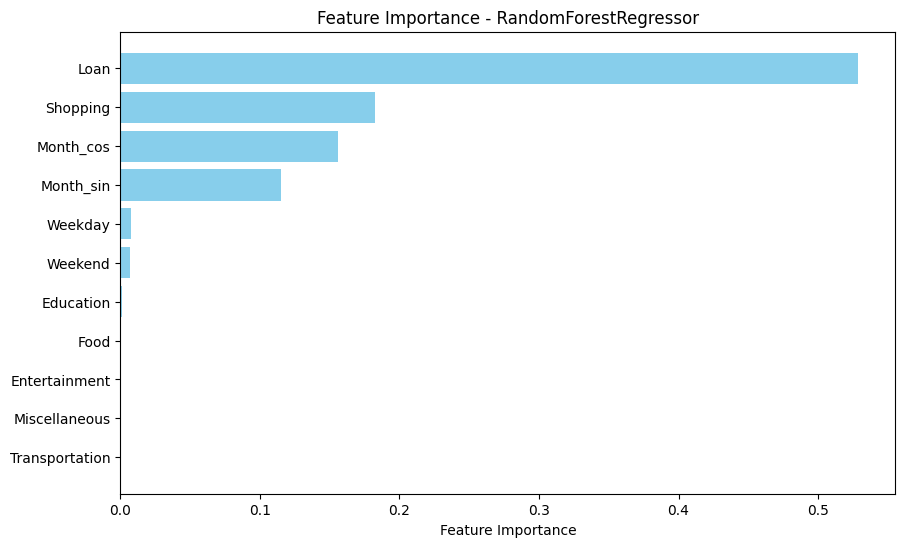

In [64]:
feature_names = X_train.columns.tolist() # List of the features
importances = rf_model.feature_importances_ # List of the features importance
feature_importance_pairs = list(zip(feature_names, importances)) # Making them into pairs
feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True) # Sorting the pairs in ascending order
sorted_features, sorted_importances = zip(*feature_importance_pairs)
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance - RandomForestRegressor')
plt.gca().invert_yaxis() 
plt.show()

In [65]:
xgb_model.feature_importances_

array([3.45005281e-03, 1.11539164e-04, 3.66007123e-04, 8.63181531e-01,
       2.06967146e-04, 9.63745043e-02, 5.21415132e-05, 6.51750201e-03,
       0.00000000e+00, 1.29014561e-02, 1.68383140e-02], dtype=float32)

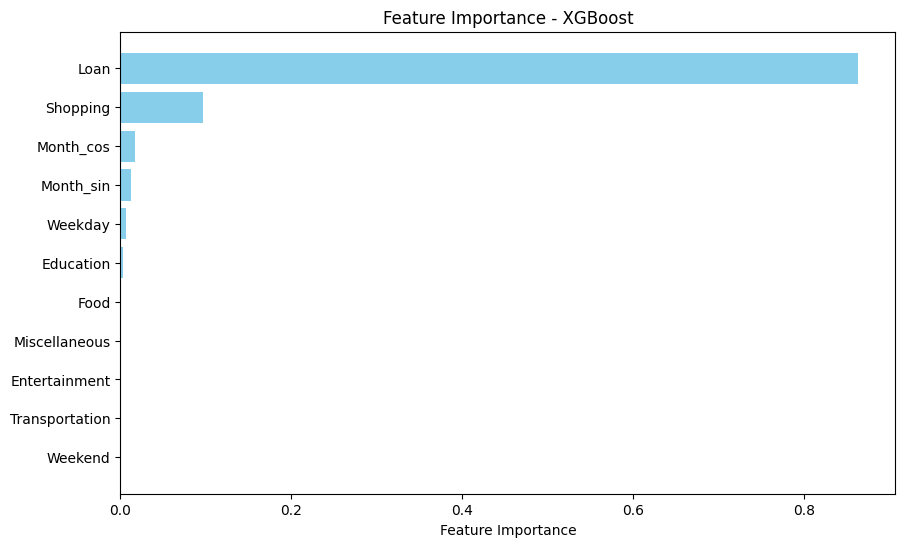

In [66]:
feature_names = X_train.columns.tolist()
importances = xgb_model.feature_importances_
feature_importance_pairs = list(zip(feature_names, importances))
feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)
sorted_features, sorted_importances = zip(*feature_importance_pairs)
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance - XGBoost')
plt.gca().invert_yaxis() 
plt.show()

##### Now I will be removing the worse scored models that were common for both the models.

In [67]:
X_train = X_train.drop(['Miscellaneous', 'Food', 'Transportation', 'Entertainment'], axis=1)
X_test = X_test.drop(['Miscellaneous', 'Food', 'Transportation', 'Entertainment'], axis=1)
X_val = X_val.drop(['Miscellaneous', 'Food', 'Transportation', 'Entertainment'], axis=1)

In [68]:
X_train.head()

,Education,Loan,Shopping,Weekday,Weekend,Month_sin,Month_cos
0,False,False,False,True,False,1.000000e+00,6.123234e-17
1,False,False,False,True,False,-2.449294e-16,1.000000e+00
2,False,False,True,True,False,-5.000000e-01,-8.660254e-01
3,False,False,False,True,False,8.660254e-01,5.000000e-01
4,False,False,False,True,False,-8.660254e-01,-5.000000e-01


## Hyperparameter tuning
##### Using randomizedsearchcv (Cross Validation) because of a relatively smaller dataset it won't take long and can reach the almost best values for both the models also since the ensemble model is also in sight the hyperparameter tuning can have some leniency.
###### Creating the search space for random forest regressor:

In [69]:
rf_param_grid = {
    "n_estimators": [50, 100, 200, 300],  # Number of trees in the forest
    "max_depth": [None, 5, 10, 20],  # Depth of each tree
    "min_samples_split": [2, 5, 10],  # Minimum samples needed to split
    "min_samples_leaf": [1, 2, 4],  # Minimum samples per leaf
    "max_features": ["sqrt", "log2", None]  # Number of features to consider for splits
} 

###### Running the randomizedsearchcv for Random forest regressor.

In [70]:
# rf_model = RandomForestRegressor(random_state=42)

rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=20,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_train, Y_train)

# Best hyperparameters
print("Best RF Parameters:", rf_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best RF Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5}


###### Creating the search space for XGBregressor:


In [71]:
xgb_param_grid = {
    "n_estimators": [50, 100, 200, 300],  # Number of boosting rounds
    "max_depth": [3, 5, 7, 10],  # How deep each tree can grow
    "learning_rate": [0.01, 0.05, 0.1, 0.2],  # Shrinkage step size
    "subsample": [0.6, 0.8, 1.0],  # Percentage of samples per tree
    "colsample_bytree": [0.6, 0.8, 1.0]  # Percentage of features per tree
}

###### Running the randomizedsearchcv for XGBregressor.

In [72]:
# xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=20,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

xgb_search.fit(X_train, Y_train)

# Best hyperparameters
print("Best XGB Parameters:", xgb_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best XGB Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


###### Checking for the best model.

In [73]:
best_rf = rf_search.best_estimator_
best_xgb = xgb_search.best_estimator_

rf_val_preds = best_rf.predict(X_val)
xgb_val_preds = best_xgb.predict(X_val)

print("RF Validation MSE:", mean_squared_error(Y_val, rf_val_preds))
print("XGB Validation MSE:", mean_squared_error(Y_val, xgb_val_preds))

RF Validation MSE: 293907580.94795924
XGB Validation MSE: 288741573.3755616


In [74]:
evaluate_model(Y_val, rf_val_preds, "Random Forest")

Random Forest performance:
R² Score: 0.1903
RMSE: 17143.7330
MAE: 8503.1854


In [75]:
evaluate_model(Y_val, xgb_val_preds, "XGB Regressor")

XGB Regressor performance:
R² Score: 0.2045
RMSE: 16992.3975
MAE: 8631.4653


##### Both the models perform almost similar.
##### Getting the best parameters.

In [76]:
best_rf_params = rf_search.best_params_
best_xgb_params = xgb_search.best_params_

## Training the model again.
##### Looping again and again to get better result.

In [77]:
# Best RF Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5}
best_rf = RandomForestRegressor(**best_rf_params, random_state=42)
best_rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=5, max_features='log2', min_samples_leaf=4,
                      min_samples_split=5, random_state=42)

In [78]:
# Best XGB Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
best_xgb = XGBRegressor(**best_xgb_params, objective="reg:squarederror", random_state=42)
best_xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [79]:
rf_val_preds = best_rf.predict(X_val)
xgb_val_preds = best_xgb.predict(X_val)

In [80]:
evaluate_model(Y_val, rf_val_preds, "Random Forest")

Random Forest performance:
R² Score: 0.1903
RMSE: 17143.7330
MAE: 8503.1854


In [81]:
evaluate_model(Y_val, xgb_val_preds, "XGB Regressor")

XGB Regressor performance:
R² Score: 0.2045
RMSE: 16992.3975
MAE: 8631.4653


##### I will try better finetuning the hyperparameters for better performance along with trying to use models like lightLGM and Catboost. Also trying linear regression to form a baseline for comparison.

In [82]:
linear_model = LinearRegression().fit(X_train, Y_train)
linear_val_preds = linear_model.predict(X_val)
evaluate_model(Y_val, linear_val_preds, "Linear model")

Linear model performance:
R² Score: 0.1798
RMSE: 17254.7253
MAE: 9166.5063


##### Similar performance to the other two models. Since the time of training (and retraining for that matter) XGBregressor has been the best model so far.
##### Using the Lightgbm and CatBoost models now.
###### Lightlgm model:

In [83]:
lgb_model = LGBMRegressor(n_estimators=1000, learning_rate=0.05, max_depth=-1, random_state=42)
lgb_model.fit(X_train, Y_train, eval_set=[(X_val, Y_val)])
lgb_val_preds = lgb_model.predict(X_val)
evaluate_model(Y_val, lgb_val_preds, "LightGBM")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 556, number of used features: 6
[LightGBM] [Info] Start training from score 11736.935741
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

##### Lightlgm model is not performing well (lower than linear regression baseline) and can be dropped.
###### CatBoost:

In [84]:
cat_model = CatBoostRegressor(iterations=2500, learning_rate=1, depth=16, l2_leaf_reg=1150, verbose=200, random_state=42)
cat_model.fit(X_train, Y_train, eval_set=(X_val, Y_val), early_stopping_rounds=100)
cat_val_preds = cat_model.predict(X_val)
evaluate_model(Y_val, cat_val_preds, "CatBoost")

0:	learn: 48868.2903562	test: 18766.5098056	best: 18766.5098056 (0)	total: 46.8ms	remaining: 1m 56s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 15921.50887
bestIteration = 21

Shrink model to first 22 iterations.
CatBoost performance:
R² Score: 0.3016
RMSE: 15921.5089
MAE: 7392.2012


##### Best model performance by far and will do hyperparameter tuning for better results.
##### Ensembling CatBoost and XGBregressor:

In [85]:
ensemble_preds = (0.9 * cat_val_preds) + (0.1 * xgb_val_preds)
evaluate_model(Y_val, ensemble_preds, "Weighted Ensemble (CatBoost 90% + XGB 10%)")

Weighted Ensemble (CatBoost 90% + XGB 10%) performance:
R² Score: 0.2957
RMSE: 15989.2100
MAE: 7513.5100


## Since the models seem to be limited by the dataset itself. CatBoost will be the final model that will be used as the API.
##### Complete training:

In [86]:
# Combining train and validation sets
X_final_train = pd.concat([X_train, X_val], axis=0)
Y_final_train = pd.concat([Y_train, Y_val], axis=0)

final_cat_model = CatBoostRegressor(
    iterations=2500, 
    learning_rate=0.01, 
    depth=6, 
    l2_leaf_reg=750, 
    verbose=200, 
    random_state=42
)

final_cat_model.fit(X_final_train, Y_final_train, early_stopping_rounds=100)

test_preds = final_cat_model.predict(X_test)
evaluate_model(Y_test, test_preds, "Final CatBoost Model")

0:	learn: 44882.4004587	total: 272us	remaining: 681ms
200:	learn: 44224.0692328	total: 53.8ms	remaining: 615ms
400:	learn: 43728.5924219	total: 106ms	remaining: 556ms
600:	learn: 43370.0399717	total: 155ms	remaining: 489ms
800:	learn: 43094.5862553	total: 205ms	remaining: 434ms
1000:	learn: 42879.8924989	total: 257ms	remaining: 385ms
1200:	learn: 42705.6178752	total: 314ms	remaining: 339ms
1400:	learn: 42586.4410487	total: 369ms	remaining: 290ms
1600:	learn: 42495.9820158	total: 431ms	remaining: 242ms
1800:	learn: 42419.7444495	total: 490ms	remaining: 190ms
2000:	learn: 42360.5433937	total: 550ms	remaining: 137ms
2200:	learn: 42310.1525608	total: 610ms	remaining: 82.9ms
2400:	learn: 42265.2130363	total: 670ms	remaining: 27.6ms
2499:	learn: 42245.0965012	total: 700ms	remaining: 0us
Final CatBoost Model performance:
R² Score: 0.2401
RMSE: 13895.9749
MAE: 6599.1343


## Downloading the Model for the API file.

In [87]:
joblib.dump(final_cat_model, "catboost_model.pkl")

['catboost_model.pkl']